In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Loading the csv into the notebook and removing N/A and an extra column in the database used
# Persian Comment:
# داده ها وارد نوتبوک میشه و مقدار های ناموجود از داده ها حذف میشه
df = pd.read_csv('cancer_classification.csv')
df.dropna(inplace = True)

In [3]:
# The data is seperated into actual data and results
# داده ها رو به دو قسمت خود داده های خام و نتایج تقسیم می کنیم
X = df.iloc[:, 0:30]
y = df['benign_0__mal_1']

# Running a standard scaler so the ML Model can make better sense of the data. Increases accracy.
# اعداد داده ها رو نمودار نرمال برده میشه تا مدل بهتر عمل کنه. دقت مدل رو بالا می بره
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [4]:
# Seperating the data into test and train dataframes to train and later test the model
# Also we keep a corresponding set of numbers to later use in the plots rather than the standardized numbers.
# داده ها به دو سری تمرین و آزمایش تقسیم میشه برای مدل
# و همچنین همین کار رو برای داده ها اصلی غیر نمودار رفته انجام میدیم تا بتونیم بعدا این اعداد رو برای گراف هامون استفاده کنیم

random_state = 4556
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, random_state = random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)

In [5]:
#This next function helps with finding the most optimal C and Gamma levels, and kernels.
#In my tests wiuth linear and RBF, RBF nearly always prevails so I just left linear out.
#By iteratively testing better and better numbers for C and Gamma we can find the optimal amounts.

"""
این فانکشن بعدی برای تشخیص بهترین بارامتر های «سی» و گاما و خود کرنل هست.
بارامتر گاما توی کرنل خطی استفاده نمیشه ولی ذاتا توی تست هایی که انجام دادم کرنل خطی
تقریبا هیچ وقت بهترین حالت نیست و حذفش کردم.
اول رنجی از اعداد رو بهش میدیم و با توجه به اینکه بهترین حالت با نزدیک شدن به انتها
های لیست بهتر میشه از اون طرف اعداد لیست رو بیشتر میکنیم تا به بهترین نتیجه نزدیک بشیم. 
"""

'\nاین فانکشن بعدی برای تشخیص بهترین بارامتر های «سی» و گاما و خود کرنل هست.\nبارامتر گاما توی کرنل خطی استفاده نمیشه ولی ذاتا توی تست هایی که انجام دادم کرنل خطی\nتقریبا هیچ وقت بهترین حالت نیست و حذفش کردم.\nاول رنجی از اعداد رو بهش میدیم و با توجه به اینکه بهترین حالت با نزدیک شدن به انتها\nهای لیست بهتر میشه از اون طرف اعداد لیست رو بیشتر میکنیم تا به بهترین نتیجه نزدیک بشیم. \n'

In [6]:
params = {
    'C': [0.9, 1, 1.1, 1.2, 1.3, 1.4, 2, 2.5, 3, 4, 5, 6, 7, 10, 20],
    'gamma': [1.5, 1, 0.7, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=4,
    verbose=1
)

clf.fit(X_scaled_train, y_scaled_train)
print(clf.best_params_)

# Loading the optimal parameters to the model
# اعدادی که این فانکشن بیدا کرده رو به مدل میدیم
calculated_C = clf.best_params_['C']
calculated_gamma = clf.best_params_['gamma']
calculated_kernel = clf.best_params_['kernel']

# Running the model
# اجرای مدل
this_Smodel = SVC(C=calculated_C, gamma=calculated_gamma, kernel = calculated_kernel)
this_Smodel.fit(X_scaled_train, y_scaled_train)
predictionsS = this_Smodel.predict(X_scaled_test)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}


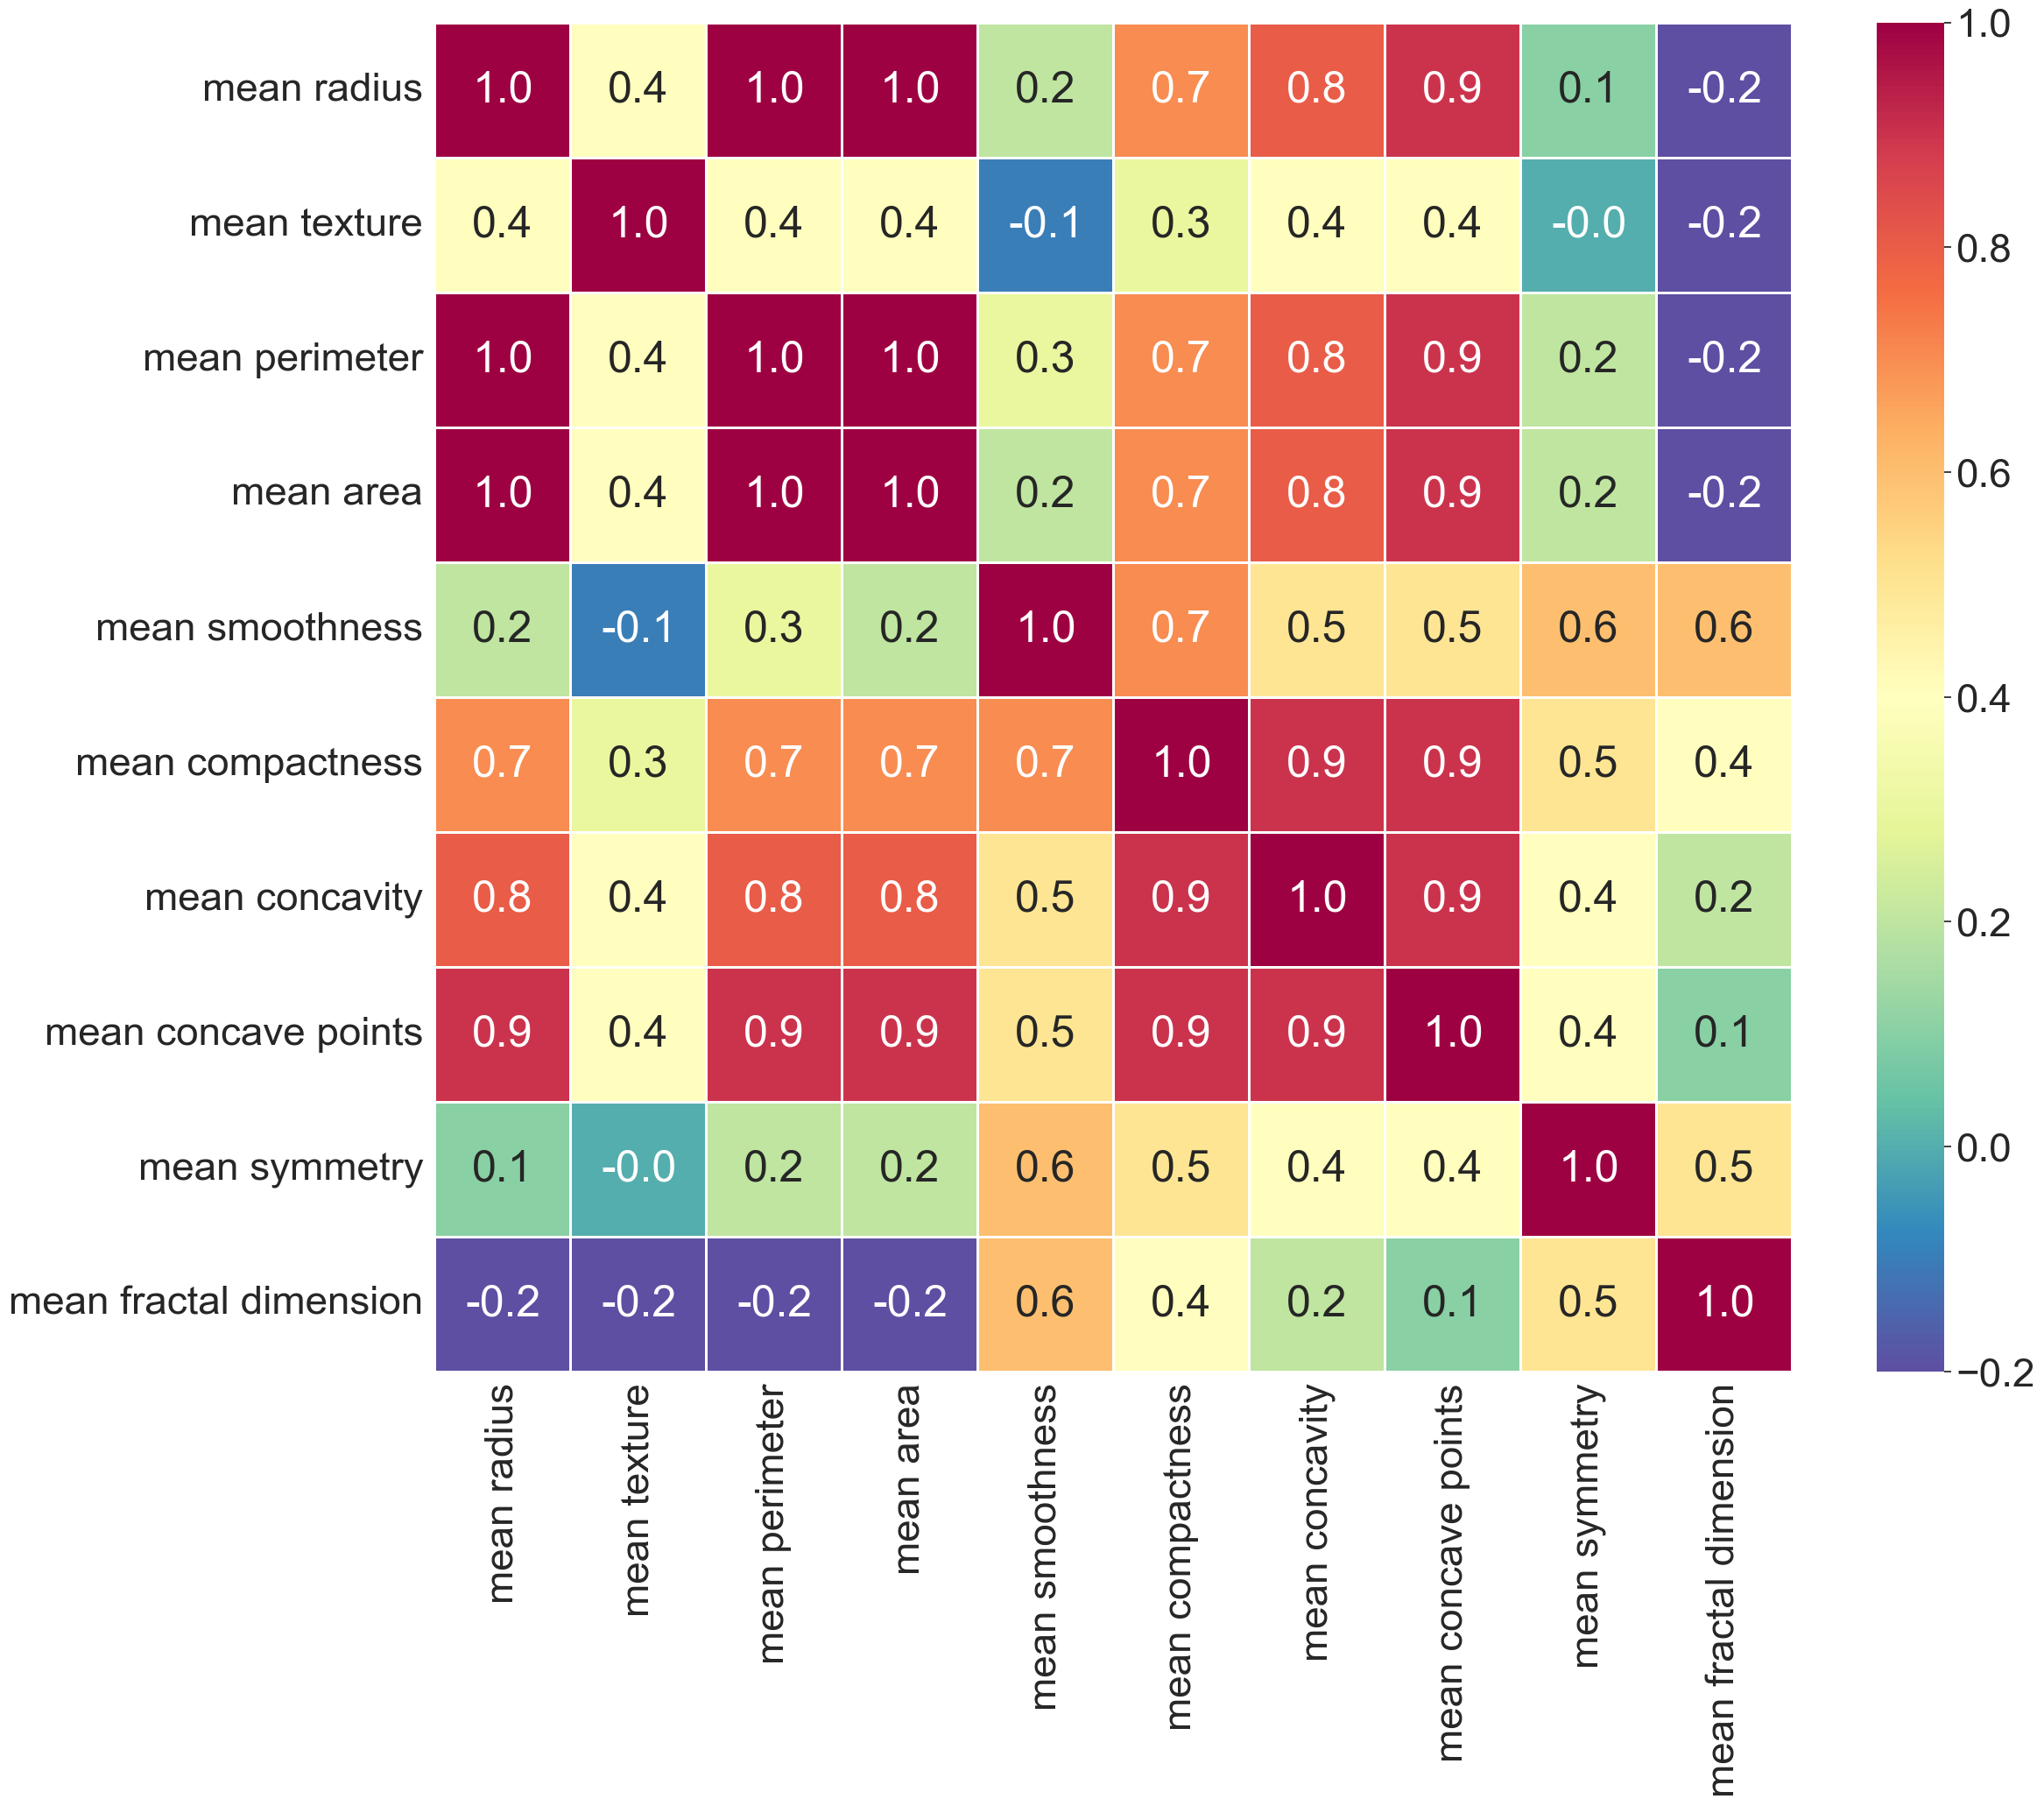

In [7]:
sns.set(font_scale = 3, rc = {'figure.figsize':(25, 20)})

hm = sns.heatmap(round(X_test.iloc[:, 0:10].corr(), 1), annot=True, cmap="Spectral_r",fmt='.01f',
                 linewidths = 1)

In [8]:
#Settings for the plots
#تنظیمات مروبط به گراف ها
sns.set_style('darkgrid')
sns.set(font_scale = 1.6, rc = {'figure.figsize':(11, 11)})

In [9]:
# There are two different kinds of plots and two of each.
# One kind focuses on showing as many dimensions of the data as possible with the hue and size and axes,
# And the other focuses on showing the borders between the data.
# And the two sets are showing the predictions that the model made,
# And the other shows the actual data from the dataset so we can compare them.

# ما اینجا دو نوع مختلف گراف داریم که یکیشون روی نشون دادن ابعاد بیشتری از داده مون تمرکز داره
# و اونیکی روی نشون دادن مرز بین نتایج.
#دو تاشون نتایج مدل رو نشون میده و دو تاشون معادل همون داده ها از خود دیتابیس تا بتونیم مقایسه شون کنیم

#B : Benign , M : Malignant

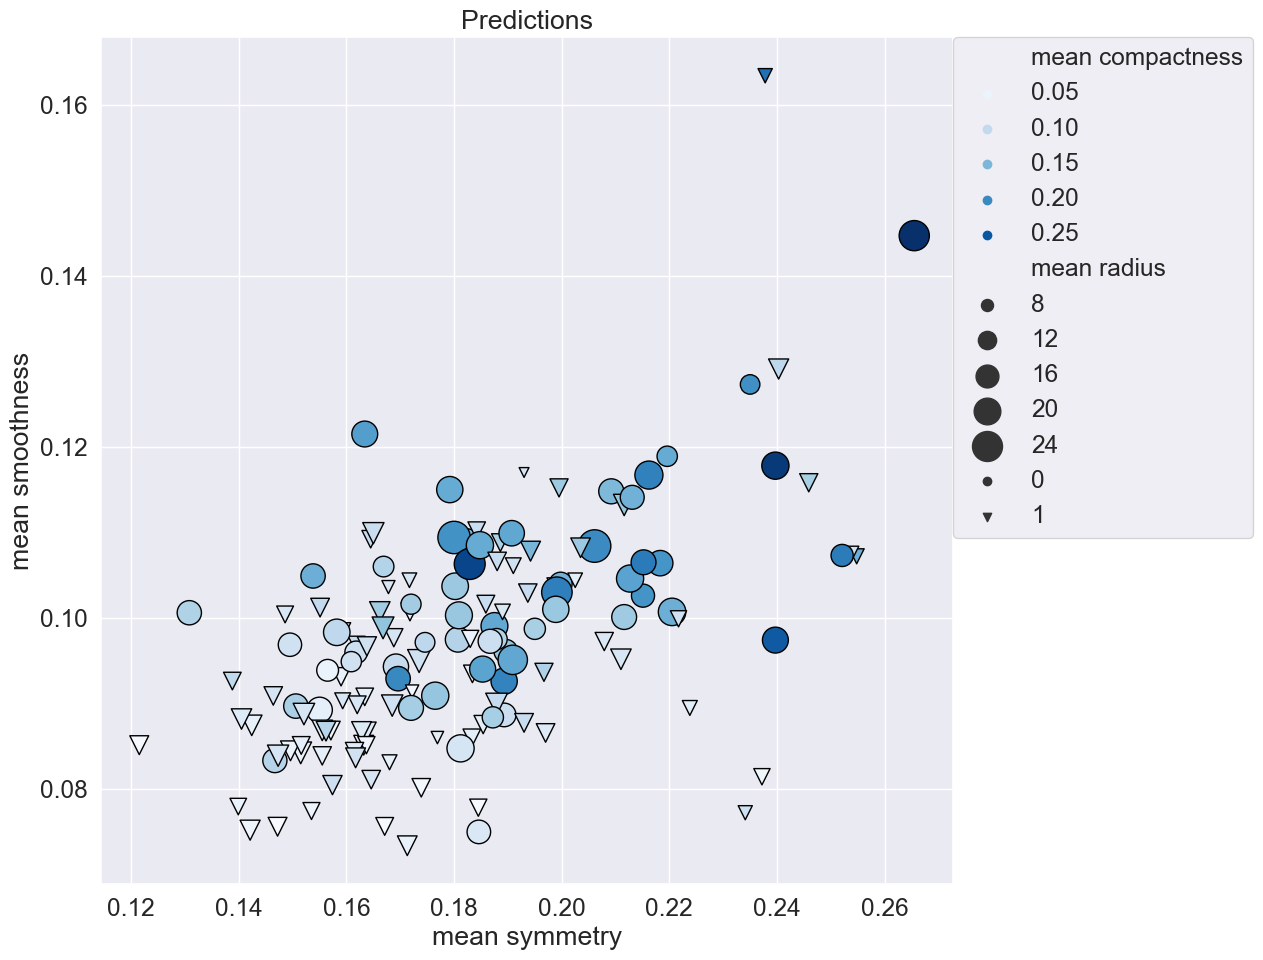

In [10]:
# The arguments here are too long to explain in comments lol, just read the docs.
#تنظیمات خود این گراف. جزییاتشو توی داکیومنتیشن میتونین بخونین

this_plot = sns.scatterplot(data = X_test, x = 'mean symmetry' , y = 'mean smoothness', sizes = (50, 550), size = X_test['mean radius'], edgecolor = 'black', linewidth = 1, hue = X_test['mean compactness'], palette = 'Blues', style = predictionsS, markers = {0: 'o', 1: 'v'})
this_plot.set(title = 'Predictions')
this_plot.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad = 0, markerscale = 1)

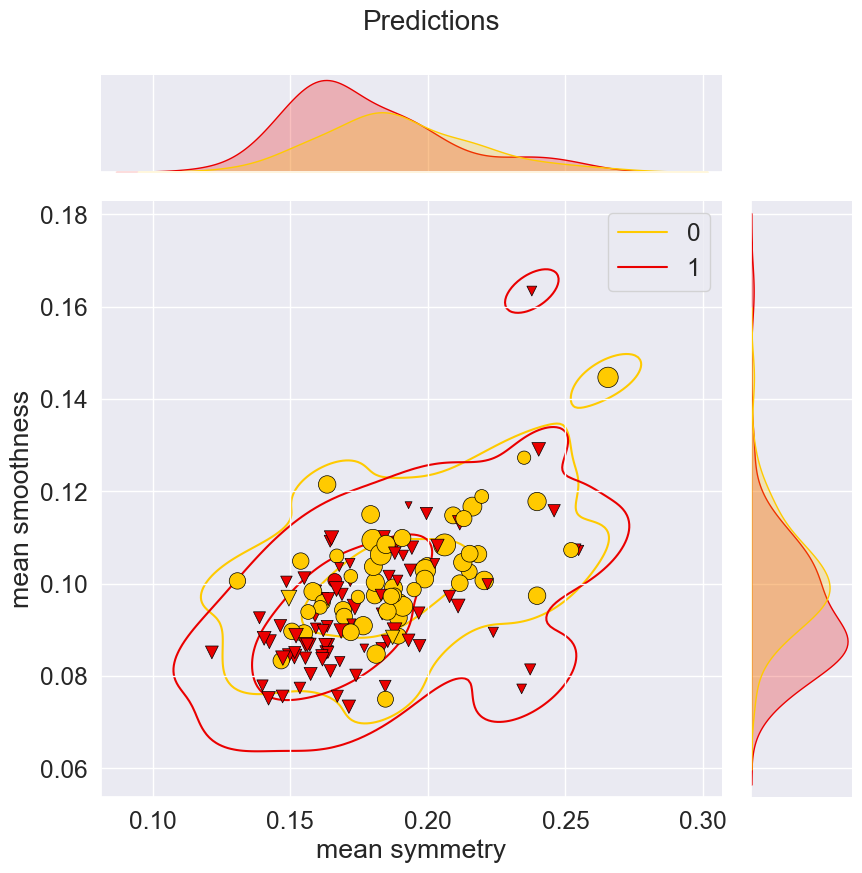

In [11]:
this_plot_joint = sns.jointplot(data = X_test, x = 'mean symmetry' , y = 'mean smoothness', sizes = (25, 250), size = X_test['mean radius'], edgecolor = 'black', linewidth = 0.5, hue = predictionsS, style = y_scaled_test, markers = {0: 'o', 1: 'v'}, palette = 'hot_r', height = 9)
this_plot_joint.fig.suptitle("Predictions", fontsize = 20)
this_plot_joint.fig.tight_layout()
this_plot_joint.plot_joint(sns.kdeplot, zorder=0, n_levels=3)

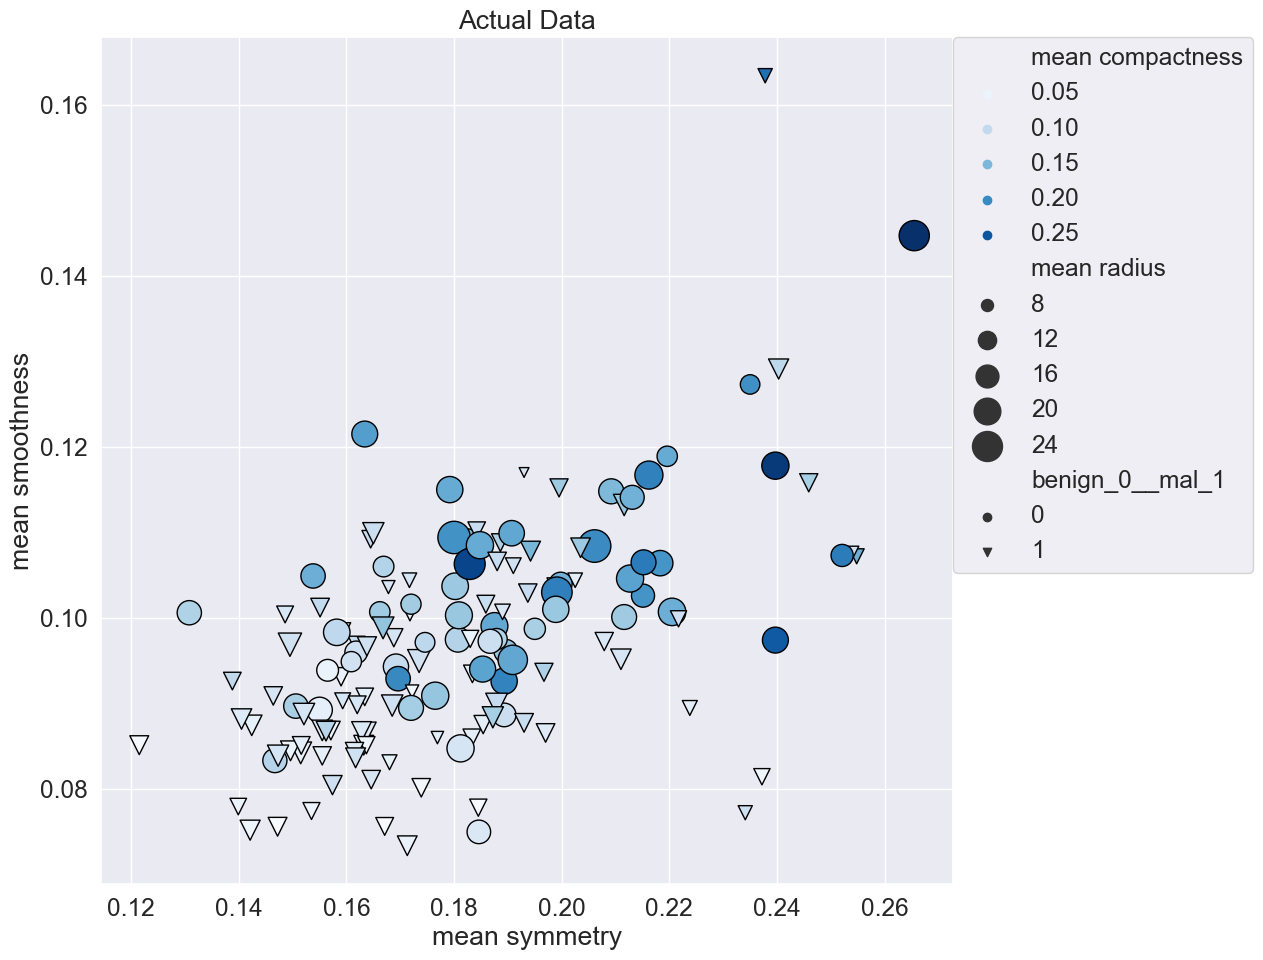

In [12]:
this_plot = sns.scatterplot(data = X_test, x = 'mean symmetry' , y = 'mean smoothness', sizes = (50, 550), size = X_test['mean radius'], edgecolor = 'black', linewidth = 1, hue = X_test['mean compactness'], palette = 'Blues', style = y_scaled_test, markers = {0: 'o', 1: 'v'})
this_plot.set(title = 'Actual Data')
this_plot.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad = 0, markerscale = 1)

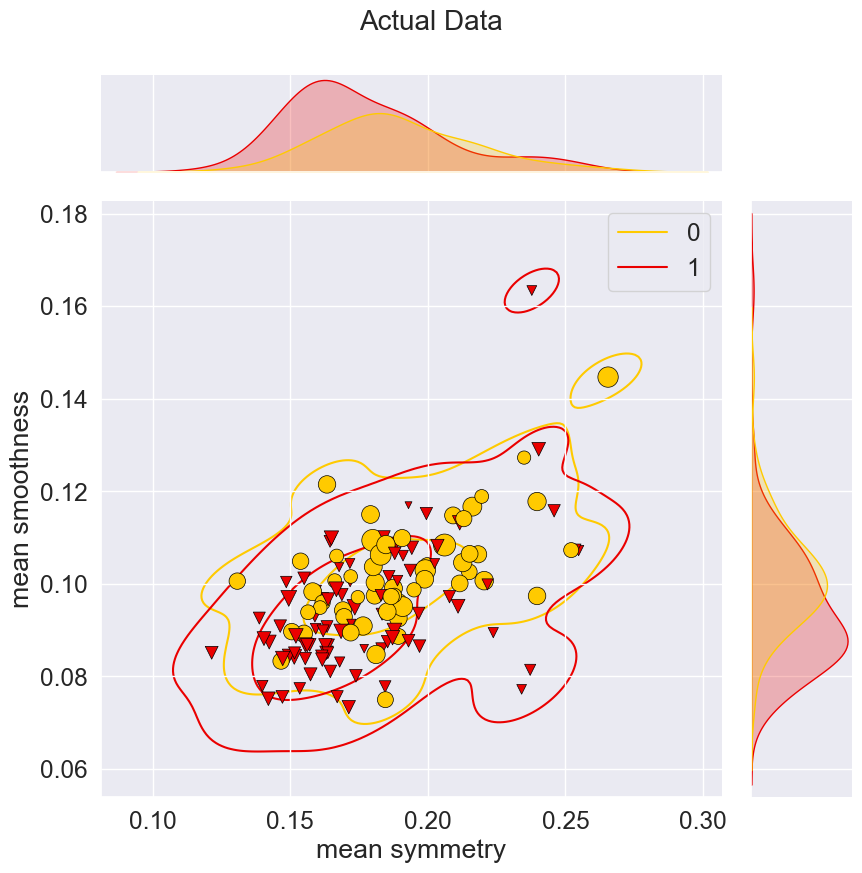

In [13]:

this_plot_joint = sns.jointplot(data = X_test, x = 'mean symmetry' , y = 'mean smoothness', sizes = (25, 250), size = X_test['mean radius'], edgecolor = 'black', linewidth = 0.5, hue = y_scaled_test.values.tolist(), style = y_scaled_test, markers = {0: 'o', 1: 'v'}, palette = 'hot_r', height = 9)
this_plot_joint.fig.suptitle("Actual Data", fontsize = 20)
this_plot_joint.fig.tight_layout()
this_plot_joint.plot_joint(sns.kdeplot, zorder = 0, n_levels = 3)

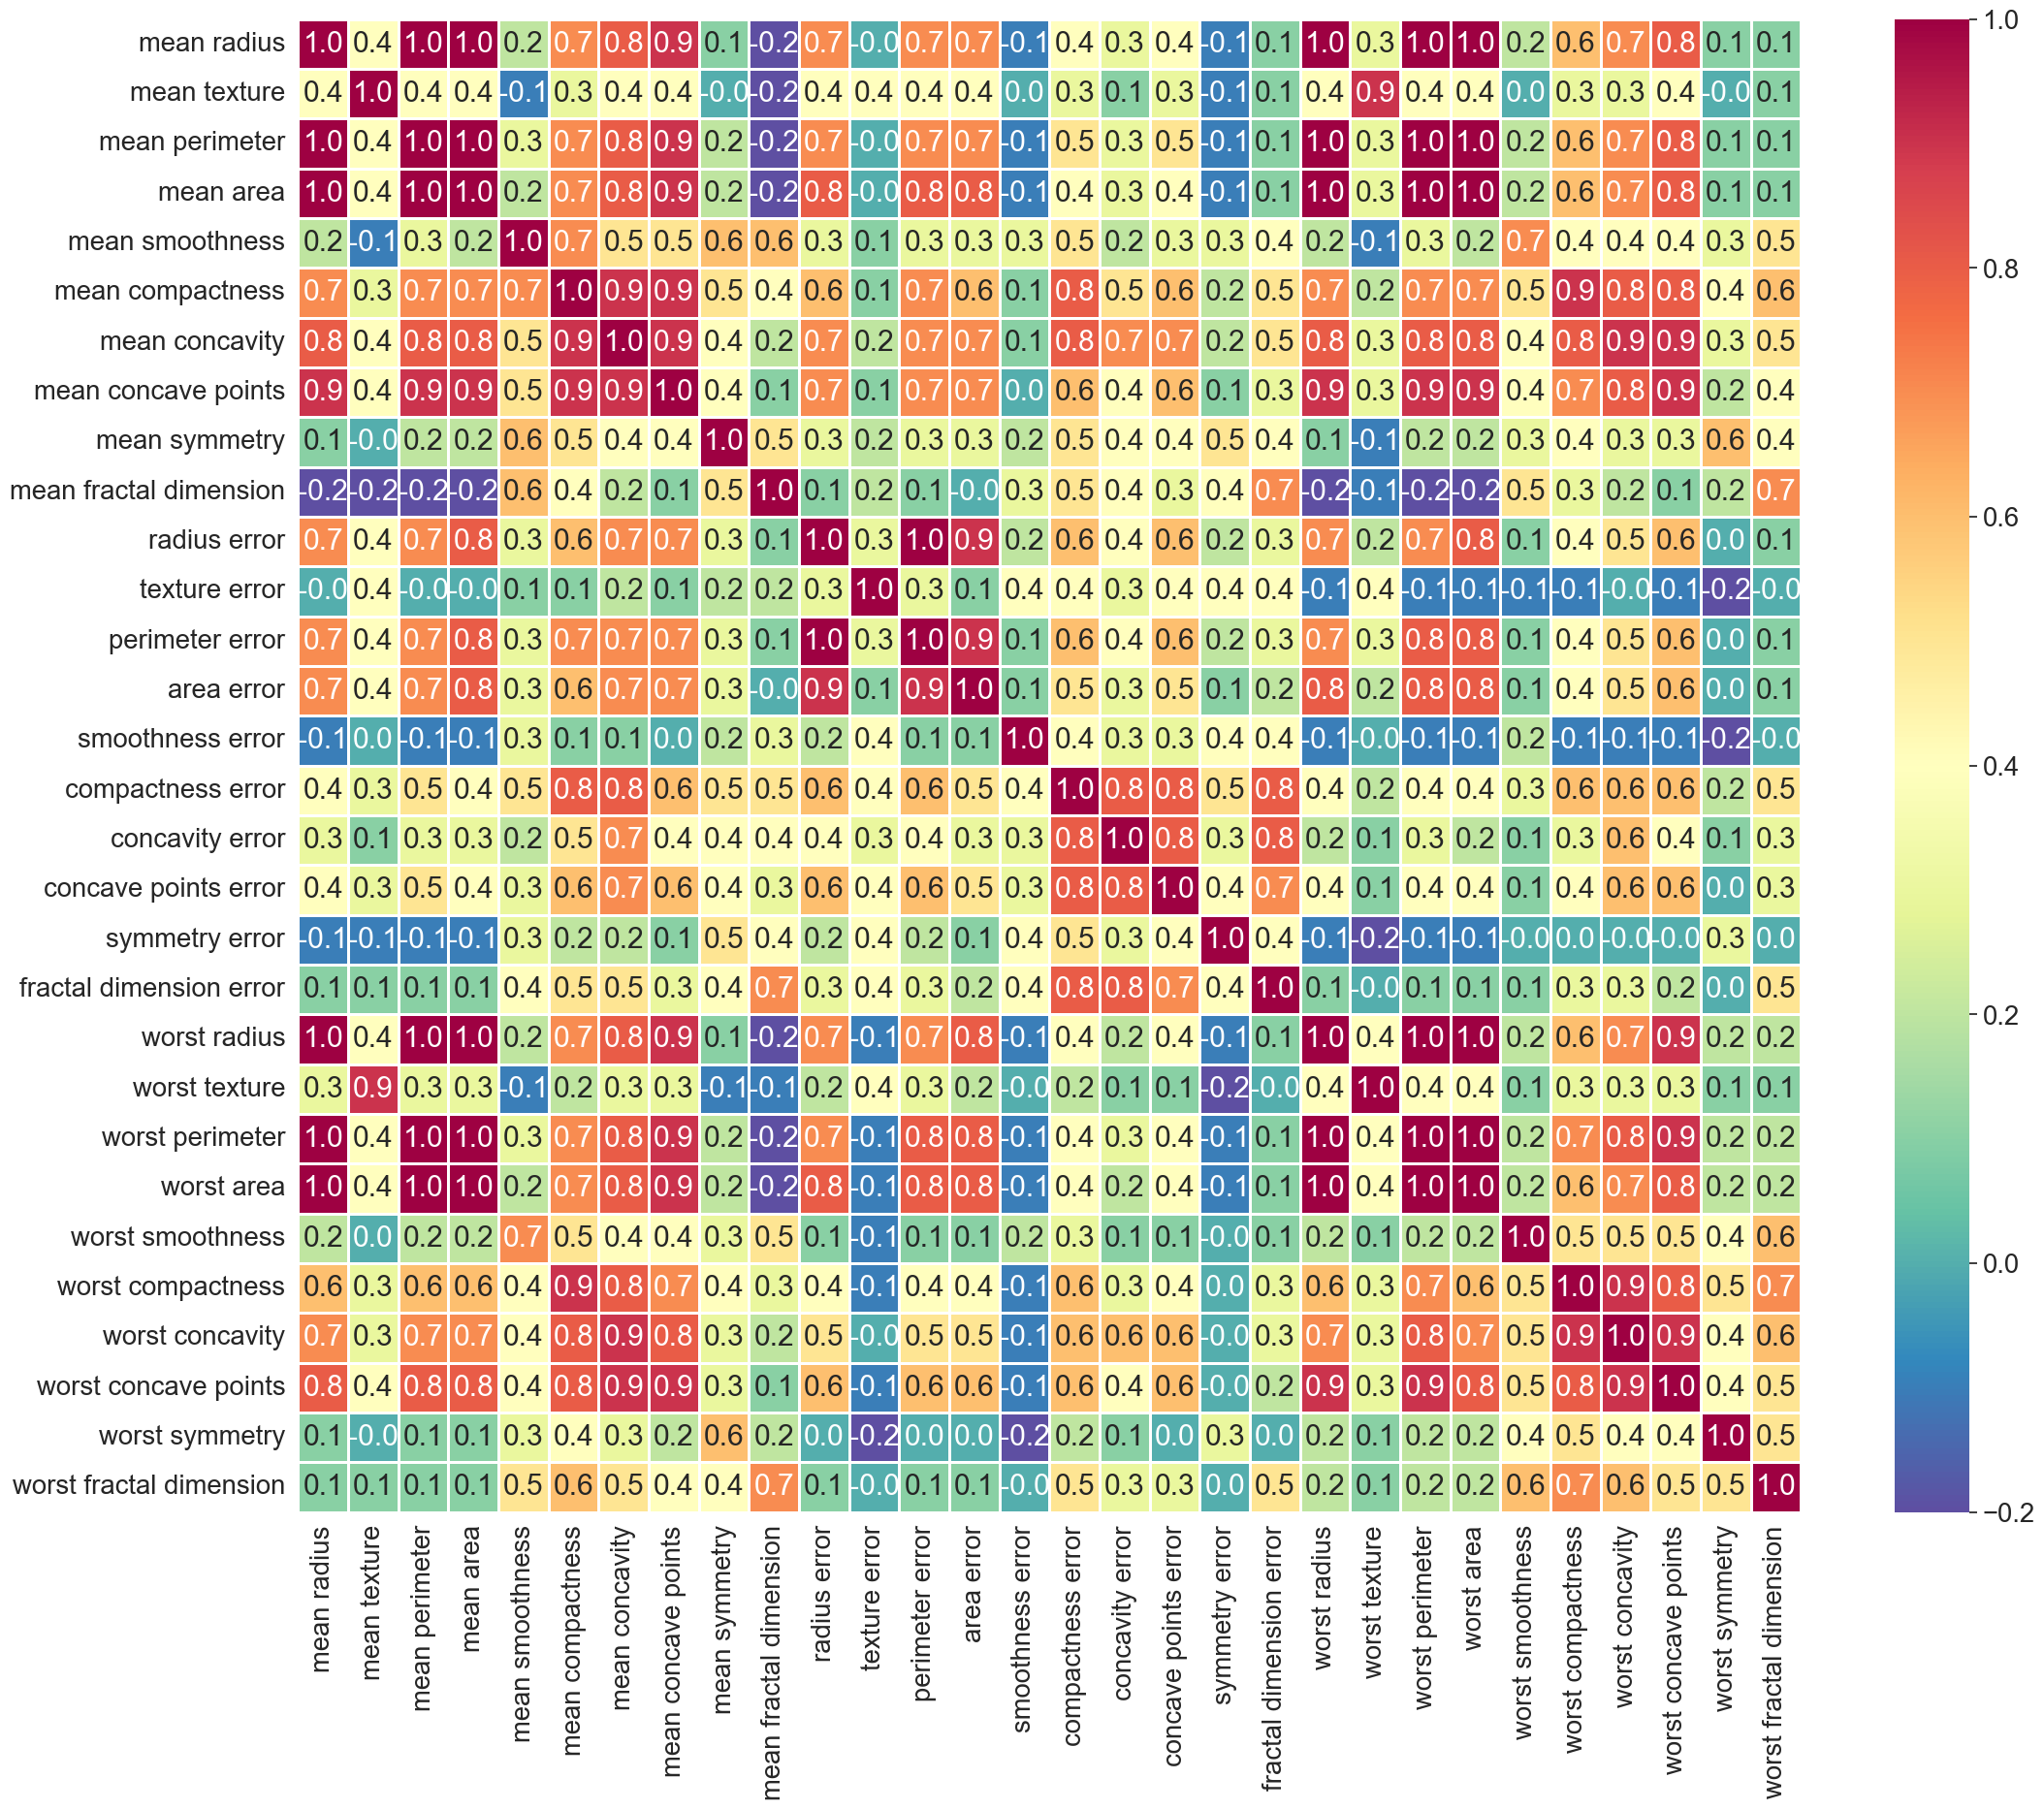

In [14]:
sns.set(font_scale = 1.8, rc = {'figure.figsize':(25, 20)})
hm = sns.heatmap(round(X_test.corr(), 1), annot=True, cmap="Spectral_r",fmt='.01f',
                 linewidths = 1)

In [15]:
# How accurately can the model predict the results
# دقت مدل در تشخیص نتایج
print("Accuracy is : " + str(round(accuracy_score(y_scaled_test, predictionsS)*100, 3)) + "%")

Accuracy is : 97.902%
